<a href="https://colab.research.google.com/github/ronil-tshah23/Product-Price-Optimizer/blob/main/Product_Price_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To determine the optimal price point of a product that maximizes revenue using demand forecasting and price elasticity concepts. The project uses simulated data and Python to build a regression model and optimization logic.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
np.random.seed(42)
prices = np.arange(80, 201, 10)
ad_spend = np.random.randint(4000, 7000, size=len(prices))
base_demand = 1000
price_elasticity = -3.5
noise = np.random.normal(0, 30, size=len(prices))
units_sold = base_demand + price_elasticity * prices + noise

In [ ]:
df = pd.DataFrame({
    "Price": prices,
    "Advertising_Spend": ad_spend,
    "Units_Sold": units_sold.astype(int)
})
df["Revenue"] = df["Price"] * df["Units_Sold"]

In [ ]:
df

,Price,Advertising_Spend,Units_Sold,Revenue
0,80,4860,705,56400
1,90,5294,701,63090
2,100,5130,636,63600
3,110,5095,601,66110
4,120,5638,587,70440
5,130,6169,487,63310
6,140,4466,458,64120
7,150,5238,458,68700
8,160,4330,409,65440
9,170,5482,414,70380


In [ ]:
X = sm.add_constant(df[["Price", "Advertising_Spend"]])
y = df["Units_Sold"]
model = sm.OLS(y, X).fit()

# Predict over a range of prices
price_range = np.arange(80, 201, 1)
ad_spend_mean = df["Advertising_Spend"].mean()

prediction_df = pd.DataFrame({
    "const": 1,
    "Price": price_range,
    "Advertising_Spend": [ad_spend_mean] * len(price_range)
})

predicted_sales = model.predict(prediction_df)
revenue = price_range * predicted_sales

# Find optimal price
optimal_idx = np.argmax(revenue)
optimal_price = price_range[optimal_idx]
optimal_revenue = revenue[optimal_idx]


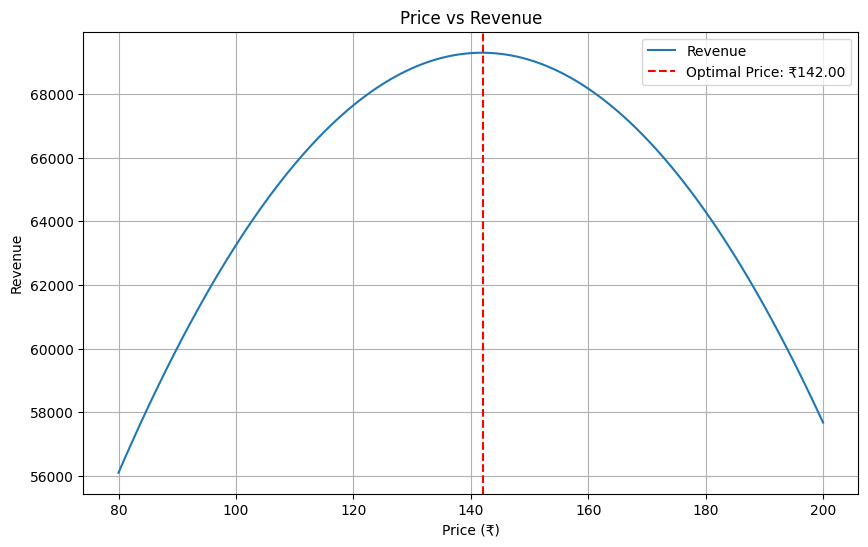

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_range, revenue, label="Revenue")
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ₹{optimal_price:.2f}')
plt.title("Price vs Revenue")
plt.xlabel("Price (₹)")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(df.head())
print(f"Optimal Price: ₹{optimal_price:.2f}")
print(f"Optimal Revenue: ₹{optimal_revenue:,.2f}")

   Price  Advertising_Spend  Units_Sold  Revenue
0     80               4860         705    56400
1     90               5294         701    63090
2    100               5130         636    63600
3    110               5095         601    66110
4    120               5638         587    70440
Optimal Price: ₹142.00
Optimal Revenue: ₹69,290.96


Conclusions drawn:

Setting the product price too low increases volume but reduces profit. Setting it too high decreases volume too much. The model helps find the balance.

The price vs revenue curve clearly visualized the impact of pricing strategy on profitability.

Set the product price around ₹142 to achieve maximum revenue, and consider re-evaluating advertising effectiveness or reallocating budget.

